In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split as split

In [ ]:
# melakukan download file dalam bentuk zip
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-06-25 04:58:12--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  33.0MB/s    in 10s     

2020-06-25 04:58:23 (29.6 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
#Memasukan library OS, dan Zipfile untuk membuka file Zip
import zipfile,os

In [ ]:
#Ekstraksi File Zip
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
os.listdir('/tmp/rockpaperscissors')

['rps-cv-images', 'scissors', 'rock', 'README_rpc-cv-images.txt', 'paper']

In [ ]:
# membuat direktori untuk train dan validation
dir_dasar = '/tmp/rockpaperscissors'
train_dir = os.path.join(dir_dasar,'train')
val_dir = os.path.join(dir_dasar, 'val')

# membuat direktori train dan validation
os.mkdir(train_dir)
os.mkdir(val_dir)

In [ ]:
# mendeklarasikan direktori batu, kertas, dan gunting
batu = os.path.join(dir_dasar,'rock')
kertas = os.path.join(dir_dasar, 'paper')
gunting = os.path.join(dir_dasar, 'scissors')

In [ ]:
# memecah direktori rock menjadi data train dan data validation
train_batu_dir, val_batu_dir = split(os.listdir(batu), test_size = 0.2)

# memecah direktori paper menjadi data train dan data validation
train_kertas_dir, val_kertas_dir = split(os.listdir(kertas), test_size = 0.2)

# memecah direktori scissors menjadi data train dan data validation
train_gunting_dir, val_gunting_dir = split(os.listdir(gunting), test_size = 0.2)

In [ ]:
train_batu = os.path.join(train_dir, 'rock')
train_kertas = os.path.join(train_dir, 'paper')
train_gunting = os.path.join(train_dir, 'scissors')
val_batu = os.path.join(val_dir, 'rock')
val_kertas = os.path.join(val_dir, 'paper')
val_gunting = os.path.join(val_dir, 'scissors')

# membuat directory baru di dalam directory train dan val
if not os.path.exists(train_batu):
  os.mkdir(train_batu)
if not os.path.exists(train_kertas):
  os.mkdir(train_kertas)
if not os.path.exists(train_gunting):
  os.mkdir(train_gunting)

if not os.path.exists(val_batu):
  os.mkdir(val_batu)
if not os.path.exists(val_kertas):
  os.mkdir(val_kertas)
if not os.path.exists(val_gunting):
  os.mkdir(val_gunting)

In [ ]:
# meng copy data train dan data val ke directory baru
import shutil

for i in train_batu_dir:
  shutil.copy(os.path.join(batu, i), os.path.join(train_batu, i))
for i in train_kertas_dir:
  shutil.copy(os.path.join(kertas,i), os.path.join(train_kertas,i))
for i in train_gunting_dir:
  shutil.copy(os.path.join(gunting,i), os.path.join(train_gunting,i))

for i in val_batu_dir:
  shutil.copy(os.path.join(batu, i), os.path.join(val_batu,i))
for i in val_kertas_dir:
  shutil.copy(os.path.join(kertas,i), os.path.join(val_kertas,i))
for i in val_gunting_dir:
  shutil.copy(os.path.join(gunting,i), os.path.join(val_gunting,i))

In [ ]:
len(os.listdir('/tmp/rockpaperscissors/train/rock'))

580

In [ ]:
len(os.listdir('/tmp/rockpaperscissors/val/rock'))

146

In [ ]:
# membuat image data generator

train_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

In [ ]:
train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size =(150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

val_gen = test_datagen.flow_from_directory(
    val_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1749 images belonging to 3 classes.
Found 439 images belonging to 3 classes.


In [ ]:
# membuat model 
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

In [ ]:
# mengcompile model
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
model.fit(
    train_gen,
    steps_per_epoch = 25,
    epochs = 10,
    validation_data = val_gen,
    validation_steps = 5,
    verbose =2)

Epoch 1/10
25/25 - 43s - loss: 0.2661 - accuracy: 0.9113 - val_loss: 0.2032 - val_accuracy: 0.9187
Epoch 2/10
25/25 - 46s - loss: 0.1754 - accuracy: 0.9362 - val_loss: 0.1624 - val_accuracy: 0.9500
Epoch 3/10
25/25 - 43s - loss: 0.1948 - accuracy: 0.9137 - val_loss: 0.1794 - val_accuracy: 0.9500
Epoch 4/10
25/25 - 43s - loss: 0.1787 - accuracy: 0.9400 - val_loss: 0.1158 - val_accuracy: 0.9438
Epoch 5/10
25/25 - 44s - loss: 0.1292 - accuracy: 0.9575 - val_loss: 0.1813 - val_accuracy: 0.9375
Epoch 6/10
25/25 - 42s - loss: 0.1705 - accuracy: 0.9354 - val_loss: 0.0780 - val_accuracy: 0.9688
Epoch 7/10
25/25 - 43s - loss: 0.1050 - accuracy: 0.9607 - val_loss: 0.1997 - val_accuracy: 0.9500
Epoch 8/10
25/25 - 42s - loss: 0.1021 - accuracy: 0.9708 - val_loss: 0.1006 - val_accuracy: 0.9750
Epoch 9/10
25/25 - 43s - loss: 0.1087 - accuracy: 0.9650 - val_loss: 0.0959 - val_accuracy: 0.9812
Epoch 10/10
25/25 - 42s - loss: 0.0989 - accuracy: 0.9670 - val_loss: 0.1861 - val_accuracy: 0.9563


Saving WhatsApp Image 2020-06-25 at 12.52.12.jpeg to WhatsApp Image 2020-06-25 at 12.52.12.jpeg
WhatsApp Image 2020-06-25 at 12.52.12.jpeg
batu


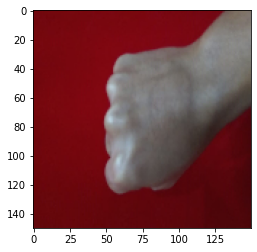

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('kertas')
  elif classes[0,1]!=0:
    print('batu')
  else:
    print('gunting')